In [1]:
import pandas as pd
import numpy as np
%config Completer.use_jedi = False 

In [96]:
from bs4 import BeautifulSoup
from nltk import word_tokenize

In [2]:
df_vocab = pd.read_csv(r"D:\data\openparliament\vocab_count_df",index_col='Unnamed: 0')

In [65]:
df_vocab.head()

,member_id,,,,,,,,,,...,ilot,omok,uberminister,oeuvrant,qoyannamiik,',"""",*,*support,EUR
0,3465,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,173,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,43,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,216,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,256,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
period_named = [x for x in df_vocab.columns if '.' in x ]

In [67]:
df_vocab.drop(period_named, axis=1, inplace=True)

In [68]:
df_vocab.head()

,member_id,,,,,,,,,,...,ilot,omok,uberminister,oeuvrant,qoyannamiik,',"""",*,*support,EUR
0,3465,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,173,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,43,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,216,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,256,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


the word counts they provide don't correspond to anything I can discern

In [69]:
df_vocab.columns

Index(['member_id', ' ', '  ', '   ', '    ', '     ', '      ', '       ',
       '        ', '         ',
       ...
       'ilot', 'omok', 'uberminister', 'oeuvrant', 'qoyannamiik', ''', '"',
       '*', '*support', 'EUR'],
      dtype='object', length=67991)

df.index = df['member_id']

In [70]:
df_wordcount = df_vocab.transpose()

In [71]:
new_header = df_wordcount.iloc[0]

In [72]:
df_wordcount = df_wordcount[1:]

In [73]:
df_wordcount.columns = new_header

In [74]:
vocab_len = df_wordcount.sum(axis=0)

In [75]:
vocab_len.sort_values(ascending=False, inplace=True)

In [76]:
vocab_len.head()

member_id
177     11772
185     11311
11      10470
9187    10332
146      9956
dtype: int64

In [77]:
df_electedmember = pd.read_csv(r"D:\data\openparliament\core_electedmember.csv")

In [78]:
df_electedmember.head()

,id,politician_id,riding_id,party_id,end_date,start_date
0,4015,2693,70159,5,2000-09-11,2000-04-02
1,4016,2693,70159,4,2001-01-28,2000-09-12
2,4017,4136,59023,4,2005-05-23,2002-01-28
3,4018,4983,70116,5,2004-05-23,2002-08-20
4,4019,5258,70139,5,2003-03-14,2003-01-16


In [17]:
politician_vocab = df_vocab.merge(df_electedmember, how='inner', left_on='member_id', right_on='politician_id')

In [18]:
politician_vocab.drop(['member_id'], axis=1, inplace=True)

'politician_id' is in politician_vocab

In [19]:
politician_vocab.head()

,,,,,,,,,,,...,"""",*,*support,EUR,id_y,politician_id,riding_id,party_id,end_date,start_date
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3210,3465,70224,4,1997-04-27,1994-01-17
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2611,3465,35066,4,2005-11-29,1997-09-22
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1534,173,47007,1,2015-10-19,2004-10-04
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,4305,173,70358,1,NaN,2015-10-19
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,3342,43,47014,28,2000-10-22,1994-01-17


In [20]:
vocab_frame=vocab_len.to_frame()

In [21]:
vocab_frame.head()

,0
member_id,
177,11772
185,11311
11,10470
9187,10332
146,9956


In [22]:
vocab_frame.rename({0: 'vocab_size'}, axis=1, inplace=True)

In [23]:
vocab_frame.head()

,vocab_size
member_id,
177,11772
185,11311
11,10470
9187,10332
146,9956


In [24]:
vocab_frame.reset_index(inplace=True)

In [79]:
vocab_frame.head()

,member_id,vocab_size
0,177,11772
1,185,11311
2,11,10470
3,9187,10332
4,146,9956


In [26]:
politician_vocab = df_electedmember.merge(vocab_frame, how='inner', left_on='politician_id', right_on='member_id')

In [27]:
politician_vocab.head()

,id,politician_id,riding_id,party_id,end_date,start_date,member_id,vocab_size
0,4015,2693,70159,5,2000-09-11,2000-04-02,2693,3340
1,4016,2693,70159,4,2001-01-28,2000-09-12,2693,3340
2,2676,2693,70159,26,2000-04-01,1997-09-22,2693,3340
3,1774,2693,24016,4,2004-05-23,2001-01-29,2693,3340
4,4017,4136,59023,4,2005-05-23,2002-01-28,4136,2545


In [28]:
politician_vocab.drop(['id'],axis=1,inplace=True)

In [29]:
politician_vocab.to_csv(r"D:\data\openparliament\politician_vocab.csv")

In [30]:
politician_vocab.start_date[0]

'2000-04-02'

In [31]:
party_vocab_size = politician_vocab.pivot_table(values='vocab_size', index='party_id', aggfunc='mean')

In [32]:
party_vocab_size.reset_index(inplace=True)

In [33]:
party_vocab_size.sort_values(by='vocab_size', inplace=True)

In [34]:
party_vocab_size.head()

,party_id,vocab_size
9,39,2534.000000
10,46,3112.714286
3,4,3209.866906
2,3,3673.690217
4,5,3900.815789


In [35]:
party_df = pd.read_csv(r"D:\data\openparliament\core_party.csv", sep='\t', header=None)

party_names = ['id', 'name_en', 'slug','short_name_en', 'name_fr', 'short_name_fr']

party_df.columns = party_names

In [36]:
party_df.head()

,id,name_en,slug,short_name_en,name_fr,short_name_fr
0,32,Abolitionist Party of Canada,NaN,Abolitionist Party of Canada,Abolitionist Party of Canada,Abolitionist Party of Canada
1,24,Animal Alliance Environment Voters Party of Ca...,NaN,Animal Alliance Environment Voters Party of Ca...,Animal Alliance Environment Voters Party of Ca...,Animal Alliance Environment Voters Party of Ca...
2,30,Canada Party,NaN,Canada Party,Canada Party,Canada Party
3,16,Canadian Action Party,NaN,Canadian Action Party,Canadian Action Party,Canadian Action Party
4,10,Christian Heritage Party of Canada,NaN,Christian Heritage Party of Canada,Christian Heritage Party of Canada,Christian Heritage Party of Canada


In [37]:
party_vocab_size = party_vocab_size.merge(party_df, how='inner', left_on='party_id', right_on='id')

In [38]:
party_vocab_size.sort_values(by='vocab_size', inplace=True, ascending=False)

In [39]:
party_vocab_size.head()

,party_id,vocab_size,id,name_en,slug,short_name_en,name_fr,short_name_fr
10,25,5569.776119,25,Canadian Alliance,alliance,Canadian Alliance,Canadian Alliance,Canadian Alliance
9,2,5096.668605,2,New Democratic Party,NDP,NDP,Nouveau Parti démocratique,NPD
8,28,4530.560000,28,Reform Party of Canada,reform,Reform,Reform Party of Canada,Reform
7,9,4487.200000,9,Green Party of Canada,green,Green,Parti verti du Canada,Vert
6,26,4380.958333,26,Progressive Conservative,pc,Progressive Conservative,Progressive Conservative,Progressive Conservative


In [40]:
from matplotlib import pyplot as plt

In [41]:
party_vocab_size.fillna('', inplace=True)

In [42]:
y_data = party_vocab_size.vocab_size.values

In [43]:
x_data = party_vocab_size.slug

In [44]:
type(x_data[1])

str

In [1]:
party_colour_dict = {28:'blue',25: 'blue', 1:'blue', 46:'turquoise', 26: 'blue',2: 'orange',5: 'grey',
                4: 'red', 9: 'green', 3: 'black', 39: 'turquoise'}

In [3]:
party_vocab_size['party_colour'] = party_vocab_size.party_id.replace(party_colour_dict)

NameError: name 'party_vocab_size' is not defined

<BarContainer object of 11 artists>

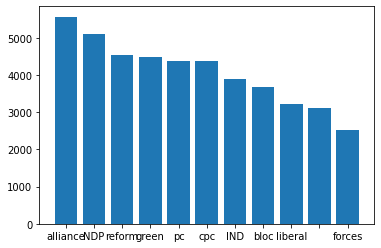

In [45]:
plt.bar(x_data, y_data)

## politician_vocab

In [46]:
politician_vocab.start_date[0]

'2000-04-02'

In [47]:
tenure = pd.to_datetime(politician_vocab.end_date, infer_datetime_format=True) - pd.to_datetime(politician_vocab.start_date, infer_datetime_format=True)  

In [48]:
politician_vocab.start_date = pd.to_datetime(politician_vocab.start_date, infer_datetime_format=True)

In [49]:
politician_vocab.end_date = pd.to_datetime(politician_vocab.end_date, infer_datetime_format=True)

In [50]:
politician_vocab["tenure"] = politician_vocab.end_date - politician_vocab.start_date

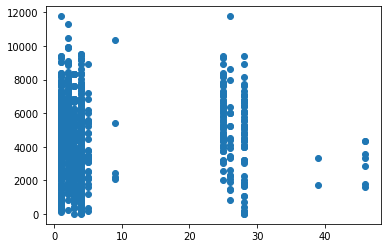

In [51]:
plt.scatter(politician_vocab.party_id, politician_vocab.vocab_size)

In [52]:
t = politician_vocab.tenure[0]

In [53]:
politician_vocab['days_elected'] = politician_vocab.tenure.apply(lambda x: x.days)

Text(0, 0.5, 'estimated vocabulary size')

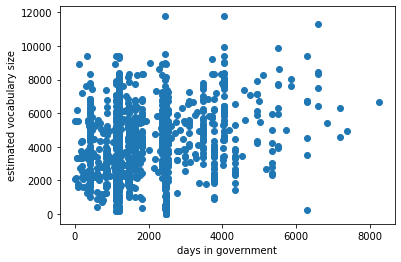

In [54]:
plt.scatter(politician_vocab.days_elected, politician_vocab.vocab_size)
plt.xlabel('days in government')
plt.ylabel('estimated vocabulary size')

next: make a graph of number of utterances in the HoC by vocab size, I suspect it'll just show 
a linear relationship

In [55]:
%%time 
df = pd.read_csv(r"D:\data\openparliament\statements_nospeaker_en.csv")

<string>:2: DtypeWarning: Columns (20,23,28,29,30,31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.


Wall time: 42.5 s


In [56]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
#utterances_df.head()

In [57]:
times_spoken = df.pivot_table(values='slug', index='politician_id', aggfunc='count')

In [58]:
times_spoken.shape

(1051, 1)

In [59]:
times_spoken.rename({'slug': 'utterances'}, axis=1, inplace=True)

In [60]:
times_spoken.head()

,utterances
politician_id,
1,2484
2,4408
5,1164
6,3130
7,1596


In [61]:
times_spoken.reset_index(inplace=True)

In [62]:
#get the rows of times_spoken that are in party_vocab

In [63]:
#party_vocab.head()

In [81]:
vocab_normal = politician_vocab.merge(times_spoken, how='left', left_on=politician_vocab.politician_id, right_on=times_spoken.politician_id)

In [82]:
vocab_normal.shape

(1499, 12)

In [83]:
vocab_normal.utterances.isna().sum()

0

In [84]:
vocab_normal.utterances.describe()

count     1499.000000
mean      1192.635090
std       1906.227905
min          1.000000
25%        182.000000
50%        547.000000
75%       1374.000000
max      21240.000000
Name: utterances, dtype: float64

In [85]:
vocab_normal.columns

Index(['key_0', 'politician_id_x', 'riding_id', 'party_id', 'end_date',
       'start_date', 'member_id', 'vocab_size', 'tenure', 'days_elected',
       'politician_id_y', 'utterances'],
      dtype='object')

In [86]:
vocab_normal['normalized_utterances'] = vocab_normal['vocab_size']/vocab_normal['utterances']

these vocab_normal numbers are awful, modifying vocab by the word count makes far more sense

In [87]:
from tokenize_column import tokenize_column

In [88]:
def tokenize_column (row):
    soup = BeautifulSoup(row)
    text = soup.text.lower()
    words = word_tokenize(text)
    return words

In [89]:
df.shape

(861398, 35)

In [90]:
df.columns

Index(['id', 'politician_id', 'riding_id', 'party_id', 'end_date',
       'start_date', 'id.1', 'document_id', 'time', 'h1_en', 'h2_en',
       'member_id', 'who_en', 'content_en', 'sequence_en', 'wordcount',
       'politician_id.1', 'procedural', 'h3_en', 'who_hocid', 'content_fr',
       'statement_type', 'written_question', 'source_id', 'who_context_en',
       'slug', 'urlcache', 'h1_fr', 'h2_fr', 'h3_fr', 'who_fr',
       'who_context_fr', 'wordcount_en', 'tokenized_content', 'slug_length'],
      dtype='object')

note - utterances_df has already been renamed to df, I think

In [97]:
%%time
df['tokens'] = df.content_en.apply(tokenize_column)

Wall time: 22min 57s


In [98]:
%%time
df['token_len'] = df.tokens.apply(len)

Wall time: 293 ms


In [ ]:
df.drop('vocab_den', axis=1, inplace=True)

In [ ]:
speech_len = df.pivot_table(values='token_len', index='member_id', aggfunc=sum)

In [ ]:
speech_len.head()

In [ ]:
speech_len.describe()

In [ ]:
speech_len['pid'] = speech_len.index

In [ ]:
speech_len.reset_index(inplace=True)

In [ ]:
speech_len.head()

merge politician_vocab with speech_len

In [ ]:
politician_vocab = politician_vocab.merge(speech_len, how='inner', left_on='politician_id', right_on='member_id')

In [ ]:
politician_vocab.head()

In [ ]:
import math

In [ ]:
politician_vocab['scaled_vocab'] = politician_vocab.vocab_size/ np.log(politician_vocab.token_len)

In [ ]:
politician_vocab.scaled_vocab.describe()

In [ ]:
plt.scatter(politician_vocab.token_len, politician_vocab.vocab_size)

look at word usage stats

In [ ]:
utterances_df.head()

In [ ]:
df.content_en[0]

In [ ]:
tdf = df[:10]

In [ ]:
from ast import literal_eval

In [ ]:
%%time
df['wordcount']= df.apply(lambda x: len(literal_eval(x['tokenized_content'])),axis=1)

In [ ]:
words_pivot = df.pivot_table(values='wordcount',index='politician_id',aggfunc=sum)

In [ ]:
politician_vocab = politician_vocab.merge(words_pivot,left_on='politician_id',right_on='politician_id')

variable completion isn't working, and this is very frustrating to type long variable names

In [ ]:
vocab = politician_vocab

In [ ]:
vocab['vocab'] = vocab['vocab_size']/vocab['wordcount']

In [ ]:
party_colour_dict = {28:'blue',25: 'blue', 1:'blue', 46:'turquoise', 26: 'blue',2: 'orange',5: 'grey',
                4: 'red', 9: 'green', 3: 'black', 39: 'turquoise'}

In [ ]:
vocab['colour'] = vocab['party_id'].replace(party_colour_dict)

In [ ]:
vocab.head()

In [ ]:
plt.scatter(vocab['start_date'],vocab['vocab'],c=vocab['colour'])
plt.xlabel('politician term start')
plt.ylabel('politician normalized vocab size')
plt.title('Normalized Vocab Sizes by Party Over Time')
plt.figure(figsize=(20,10))
plt.show()
#plt.savefig(r'C:\Users\alecr\Projects\openparliament-NLP\word_stats\politician_vocab.png')

In [ ]:
df.pivot_table(values='member_id',index='')